In [68]:
from classo.solve_R2 import pathlasso_R2, Classo_R2, problem_R2
from classo.solve_R1 import pathlasso_R1, Classo_R1, problem_R1
from classo.solve_R3 import pathlasso_R3, Classo_R3, problem_R3
from classo.compact_func import Classo, pathlasso
from classo import random_data, classo_problem
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

m,d,d_nonzero,k,sigma =200,150,6,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=None)

In [95]:
lam = 1.
pb_dr = problem_R3((X,C,y),'DR')
pb_pa = problem_R3((X,C,y),'Path-Alg')
pb_dr.gam = 1.
pb_dr.compute_param()
print(pb_dr.c)

beta_dr, _ = Classo_R3(pb_dr,lam)
beta_pa, _ = Classo_R3(pb_pa,lam)

33.48861975951672


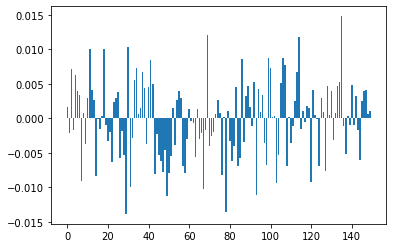

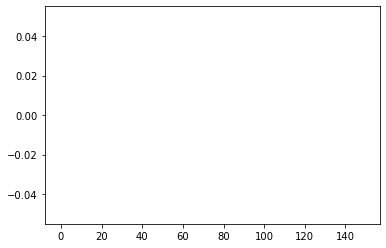

In [92]:
for beta in [beta_dr,beta_pa]:
    plt.bar(range(len(beta)),beta)
    plt.show()

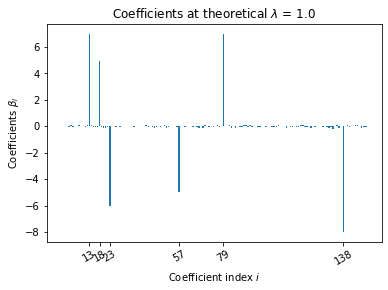


 LAMBDA FIXED : 
   Sigma  =  0.535
   Selected variables :  13    18    23    57    79    138    
   Running time :  0.115s


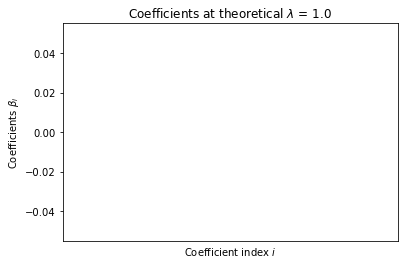


 LAMBDA FIXED : 
   Sigma  =  2.057
   Selected variables :  
   Running time :  0.006s


In [23]:
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = True

problem.model_selection.LAMfixed                = True
problem.model_selection.StabSel             = False

problem.model_selection.LAMfixedparameters.rescaled_lam = True
problem.model_selection.LAMfixedparameters.lam = 1.


problem.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.LAMfixed)

problem.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.LAMfixed)